# Question 1 - Cross-Correlation

The cross-correlation of two functions $f(x)$ and $g(x)$ is defined as
$$(f \ast g)(y) = \int f(x)g(x + y)dx$$

Similarly to the convolution, it is straightforward to show that this can be evaluated using Fourier transforms as
$$FT(f \ast g) = FT(f)\ast\overline{FT(g)}$$
where $FT$ indicates a Fourier transform and the overbar indicates the complex conjugate.

## **a)** Proof

Imagine that we have the values of two functions $f$ and $g$ defined on a grid in $x$ with $n$ grid points. The integral defining the cross-correlation becomes a sum in this discrete case.

### **Show that there are $2n - 1$ possible values of $y$ at which $f \ast g$ can be evaluated.**

On a grid of $n$ points in $x$, $x$ can take values from $0 \rightarrow n-1$. Since $g(x - y)$ is only defined when $x - y$ is within the range of grid points for $x$, that is, when $0 \leq x - y \leq (n-1)$. This means that on one side, $y$ is bounded by the maximum value of $x$:
$$ 0 \leq x - y \\
\rightarrow 0 \leq (n - 1) - y \\
\rightarrow -(n - 1) \leq -y \\
\rightarrow (n - 1) \geq y$$

and the other side of y is bounded by the minimum value for $x$:
$$ x - y \leq (n - 1) \\
\rightarrow 0 - y \leq (n - 1) \\
\rightarrow -y \leq (n - 1) \\
\rightarrow y \geq -(n - 1)\\
$$

Therefore, the possible values for $y$ range from $-(n-1) \rightarrow (n-1)$.
$$ n - 1 - (- (n - 1)) = n - 1 - (-n + 1) = n - 1 + n - 1  = 2n - 2$$
But we must also include 0 as a possible state of y:
$$2n - 2 + 1 = 2n - 1$$
Therefore, there are $2n - 1$ possible values for $y$.

**Write a function that evaluates the sum and returns the vector containing the $2n - 1$ values of $f\ast g$.**

 In general, the value for $y$ will be determined by the value for $x$ in order to keep $x - y$ within the range of x:
$$ 0 \leq x - y\\
(0 - x) \leq -y\\
-x \leq -y\\
x \geq y\\
$$
and
$$ x - y \leq (n - 1) \\
-y \leq (n - 1 - x) \\
y \geq -(n - 1 - x) \\
y \geq (-n + 1 + x)
$$
So, in general:
$$(-n + 1 + x) \leq y \leq x$$

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian(x, mid_point, sigma, amplitude = -0.5):
    return np.exp(amplitude*(x - mid_point)**2/sigma**2) / np.sqrt(2*np.pi*sigma)

def cross_correlation(f, g):
    '''
    This function computes the cross-correlation of two signals f and g.
    Inputs:
        f: a 1D numpy array
        g: a 1D numpy array
    Output:
        result: a 1D numpy array of length 2n - 1, where n is the length of f    
    '''
    # Initialize the parameters, assume f and g have the same length
    n = len(f)
    result = np.zeros(2 * n - 1)

    # Compute the cross-correlation
    for j in range(-(n-1), n): # y ranges from -(n-1) to n-1     
        for i in range(n):
            if (i + j) >= 0 and (i + j) < n: # Only sum over the indices where f and g overlap
                result[j] += f[i] * g[i + j]
    
    # Shift the results array to account for the non-monotonic ordering of y (zero offset is at the center)
    result = np.roll(result, n - 1)

    return result

In [10]:
n = 128

x = np.linspace(-1, 1, n, endpoint = True)
f = gaussian(x, 0, 0.1)  # Gaussian function centered at 0
g = gaussian(x, 0.5, 0.1)  # Gaussian function centered at 0.5

sum_result = cross_correlation(f, g)

print(f'The length of f is {n}, so 2n - 1 = {2*n-1}')
print('The length of the cross-correlation result is', len(sum_result))

The length of f is 128, so 2n - 1 = 255
The length of the cross-correlation result is 255


## **b)** Implementation with Fourier Transforms

**Implement the cross-correlation using the Fourier transform**.

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def cross_correlation_fft(f, g, pad = True):
    if pad:
        # Zero-pad the vectors to ensure 2n-1 values in the result
        n = len(f) + len(g) - 1
    else:
        n = len(f)

    # Compute the FFT of the padded vectors
    F_f = np.fft.fft(f, n)
    F_g = np.fft.fft(g, n)

    cross_correlation = np.fft.ifft(np.conj(F_f) * F_g)

    return np.fft.fftshift(cross_correlation)

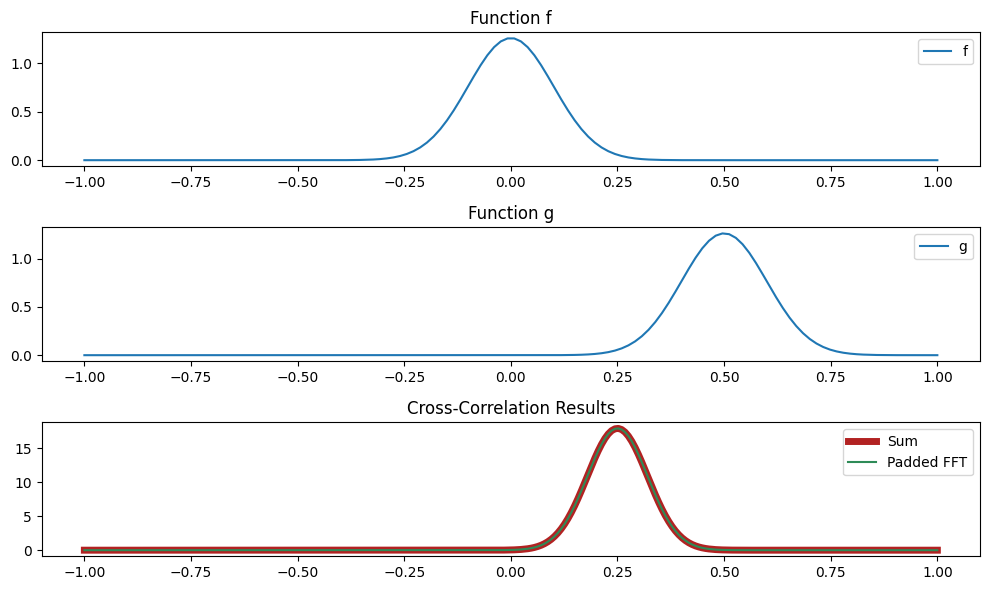

In [17]:
n = 128

x = np.linspace(-1, 1, n, endpoint = True)
f = gaussian(x, 0, 0.1)  # Gaussian function centered at 0
g = gaussian(x, 0.5, 0.1)  # Gaussian function centered at 0.5

sum_result = cross_correlation(f, g)
fft_result = cross_correlation_fft(f, g)

# Plotting
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(x, f, label='f')
plt.legend()
plt.title('Function f')

plt.subplot(3, 1, 2)
plt.plot(x, g, label='g')
plt.legend()
plt.title('Function g')

res_x = np.linspace(-1, 1, 2*n-1, endpoint = True)
plt.subplot(3, 1, 3)
plt.plot(res_x, sum_result, color = "firebrick", linewidth = 5, label='Sum')
plt.plot(res_x, fft_result, color = "seagreen", label='Padded FFT')
plt.legend()
plt.title('Cross-Correlation Results')

plt.tight_layout()
plt.show()

## **c)** No Padding

**Repeat part b) without zero-padding the DFTs.**

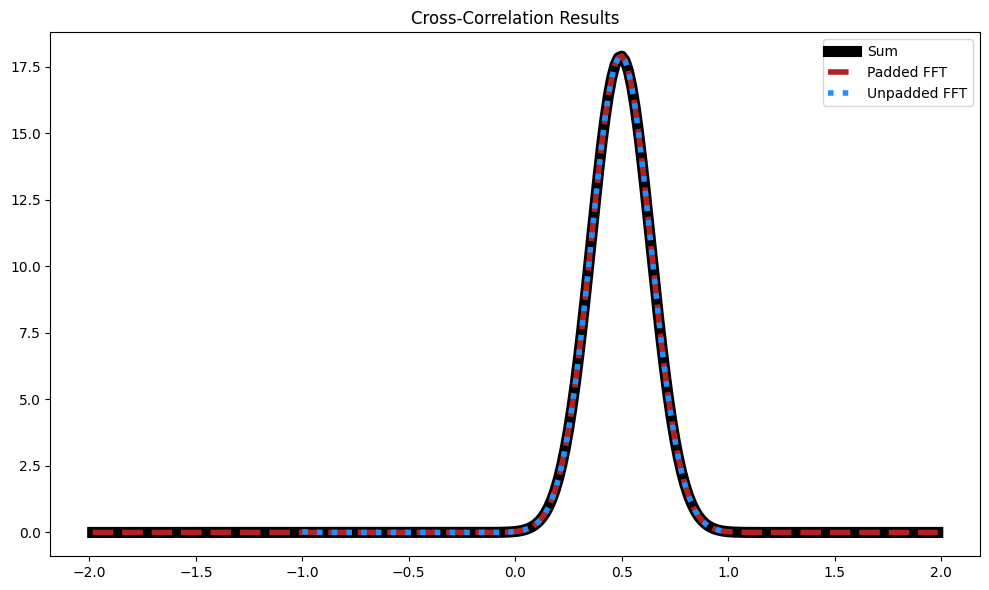

In [38]:
n = 128

x = np.linspace(-1, 1, n, endpoint = True)
f = gaussian(x, 0, 0.1)  # Gaussian function centered at 0
g = gaussian(x, 0.5, 0.1)  # Gaussian function centered at 0.5

sum_result = cross_correlation(f, g)
pad_fft_result = cross_correlation_fft(f, g)
unpad_fft_result = cross_correlation_fft(f, g, pad = False)


# Plotting
plt.figure(figsize=(10, 6))

xx1 = 2*np.arange(-(n-1), n)/n
xx2 = 2*np.arange(-(n-1)//2, n//2)/n
plt.plot(xx1, sum_result, color = "black", linewidth = 8, label='Sum')
plt.plot(xx1, pad_fft_result, color = "firebrick", linewidth = 4, ls = "--", label='Padded FFT')
plt.plot(xx2, unpad_fft_result, color = "dodgerblue", linewidth = 4, ls = ":", label='Unpadded FFT')
plt.legend()
plt.title('Cross-Correlation Results')

plt.tight_layout()
plt.show()

**What difference does it make?**

When you don't zero-pad the DFTs before computing the cross-correlation using FFT, the convolution can only compare the correlation of the functions without any shift. Normally, cross-correlation takes two signals and shifts them by one each time, calculating the correlation point-by-point for each shift. In the case of the two gaussians, they are identical and so for some shift value should match perfectly. However, if there is no padding, there is no room in the array for the two gaussians to shift left or right relative to each other, and so we only get the correlation for the original, unshifted positions.

**What part of the cross-correlation function is computed in this case?**

The cross-correlation that is computed when there is zero padding is the immediate correlation of f with g without any shifting. That is why there is only 100 points, as this is the range $0 \rightarrow n-1$ that I provided it, and it is doing a 1-to-1 correlation between the two functions.

# Question 2 - Diffusion with Chebyshev Polynomials

Solve the diffusion equation
$$\frac{\partial f}{\partial t} = \frac{\partial^2f}{\partial x^2}$$
for $f(x)$ between $x = 0$ and $1$ with boundary conditions $f(\pm 1) = 0$. You should use a spectral method based on Chebyshev polynomials. That is, write $f(x)$ as a series of Chebyshev polynomials
$$f(x) = \sum_i a_i(t)T_i(x)$$
where $T_i(x)$ is the *i*th Chebyshev polynomial and $a_i(t)$ are the coefficients that you evolve in time.

As a test problem:
- Take the initial $f(x)$ to be the Green's Function for the diffusion equation evaluated at an initial time $t = t_0$ and evolve it forwards in time, comparing with the analytic solution. 
- Check how the error compared to the analytic solution depends on the number of modes that you include in your Chebyshev series.
- Comment on how the scaling compares with what you would expect from finite differences.


Notes:
- You can fit a Chebyshev series to your initial $f(x)$ using np.polynomial.chebyshev.chebfit
- You should use an even number of polynomials in your Chebyshev series
- Once you have the initial coefficients $a_i$, you can evolve them in time with a first order explicit Euler update
- To calculate $\frac{da_i}{dt}$, you can use np.polynomial.chebyshev.chebder to obtain coefficients of a Chebyshev series representing the second derivative $\frac{\partial^2 f}{\partial x^2}$
- To enforce the boundary conditions initially and after each timestep, you can use the last two $a_i$ values to set the sum of the even $a_i$ coefficients and the odd $a_i$ coefficients to zero.
- Set the coefficients to zero if they become too small, e.g. set $a_i = 0$ if $a_i$ drops below $10^{-10}$

First, we can visually compare the diffusion process between the numerical (Chebychev Polynomial) approximation and the Analytical solutions at each time step. This is shown in the graphs below for 4000 timesteps.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import chebyshev

def gaussian(x, x0, t, D):
    # Green's function for the diffusion equation
    return np.exp(-(x-x0)**2/(4*D*t)) / np.sqrt(4*np.pi*D*t)

def greens_bounded(x, x0, t, D):
    # Green's function for the diffusion equation with zero boundary conditions at x=-1,+1
    f = gaussian(x, x0, t, D)
    f -= gaussian(x, -1-(1+x0), t, D)
    f -= gaussian(x, 1+(1-x0), t, D)
    return f

def enforce_bc(a):
    """
    Enforce the boundary conditions on the Chebyshev coefficients.

    Parameters:
    - a: Chebyshev coefficients.

    Returns:
    - Chebyshev coefficients with boundary conditions enforced.
    """
    a[-1] = -np.sum(a[:-1:2])
    a[-2] = -np.sum(a[1:-2:2])

    return a

def evolve_coefficients(a, dt):
    """
    Evolve Chebyshev coefficients using a first-order explicit Euler update.

    Parameters:
    - a: Chebyshev coefficients.
    - dt: Time step.
    - D: Diffusion coefficient.
    - N: Number of Chebyshev modes.

    Returns:
    - Updated Chebyshev coefficients.
    """
    da_dt = dt * chebyshev.chebder(a, m = 2) # Calculate the second derivative using Chebyshev differentiation

    a[:-2] = a[:-2] + da_dt # Update coefficients using first-order explicit Euler method    
    a[np.abs(a)/np.max(np.abs(a)) < 1e-10] = 0 # Set coefficients to zero if they become too small
    a = enforce_bc(a) # Enforce boundary conditions

    return a

def solve_diffusion_equation(x, T, num_modes, t0, t_end, dt):
    """
    Solve the diffusion equation using Chebyshev spectral method.

    Parameters:
    - N: Number of Chebyshev modes (even).

    Returns:
    - f_values: Array of numerical solutions at different time steps.
    - a_values: Array of Chebyshev coefficients at different time steps.
    """
    # Verify even number of modes
    if num_modes % 2 != 0:
        num_modes += 1
    
    a = chebyshev.chebfit(x, T, num_modes) # Initial Chebyshev coefficients
    a = enforce_bc(a) # Enforce boundary conditions

    num_iterations = int((t_end - t0) / dt) # Number of time steps
    dt = (t_end - t0) / num_iterations # Adjust dt to ensure timesteps cover the desired time interval

    poly = chebyshev.Chebyshev(a) # Initial Chebyshev polynomial

    # Initialize arrays to store the numerical solutions at different time steps
    f_values = np.zeros((num_iterations + 1, len(x)))

    # Store the initial numerical solution
    f_values[0] = poly(x)

    # Evolve the Chebyshev coefficients and numerical solution at each time step
    for i in range(num_iterations):
        a = evolve_coefficients(a, dt)
        t = t0 + (i + 1) * dt
        poly = chebyshev.Chebyshev(a)
        f_values[i + 1] = poly(x)

    return f_values

In [6]:
# Set parameters
n = 128 # Number of grid points
x = np.linspace(-1, 1, n, endpoint = True)
dx = x[1] - x[0]
t0 = 0.01
x0 = 0.2
T_init = greens_bounded(x, x0, t0, 1)
t_end = 30*t0
dt = 1e-6

num_chebyshev = 12 # Number of Chebyshev modes

# Solve the diffusion equation
f_values = solve_diffusion_equation(x, T_init, num_chebyshev, t0, t_end, dt)

In [7]:
# Get analytic solution at each timestep
analytic_values = np.zeros((len(f_values), len(x)))
for i in range(len(f_values)):
    analytic_values[i] = greens_bounded(x, x0, t0 + i * dt, 1)

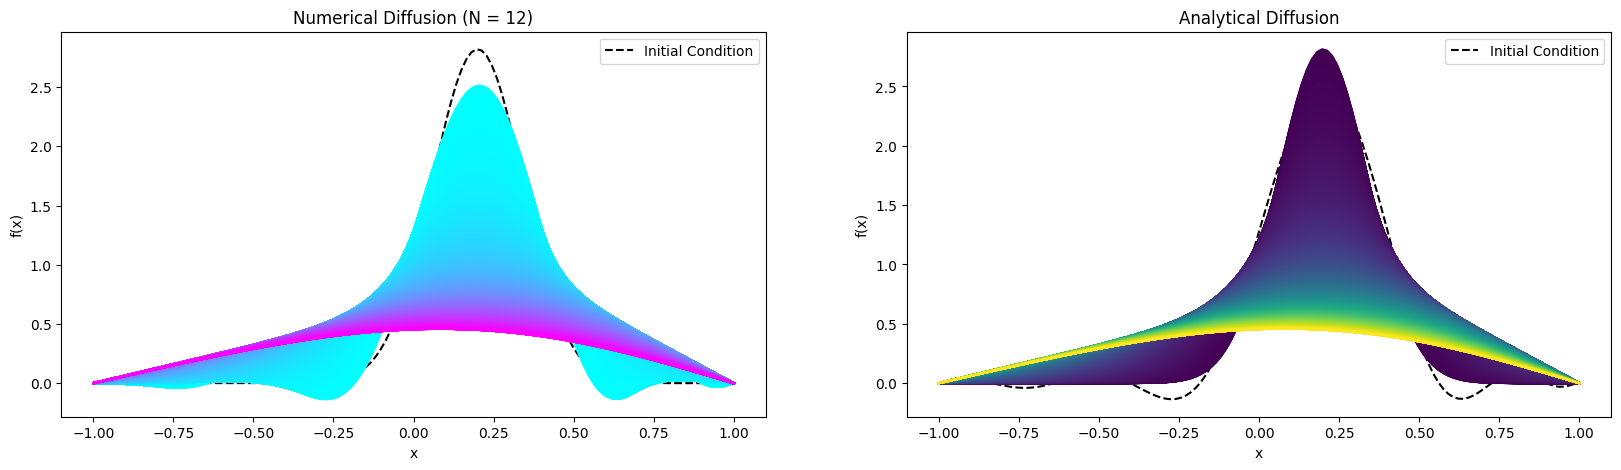

In [13]:
# Plot the results
plt.figure(1, figsize=(20, 5))
plt.subplot(1, 2, 1)

plt.plot(x, T_init, color='black', linestyle = "dashed", label='Initial Condition') # Plot initial function in dashed black
color_list = plt.cm.cool(np.linspace(0, 1, len(f_values)))
for i in range(0, len(f_values)-2, 50):
    plt.plot(x, f_values[i], color=color_list[i])

plt.legend()
plt.title(f'Numerical Diffusion (N = {num_chebyshev})')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.subplot(1, 2, 2)
plt.plot(x, f_values[0], color='black', linestyle = "dashed", label='Initial Condition') # Plot initial function in dashed black
color_list_analytical = plt.cm.viridis(np.linspace(0, 1, len(analytic_values)))
for i in range(50, len(analytic_values)-2, 50):
    plt.plot(x, analytic_values[i], color=color_list_analytical[i])

plt.legend()
plt.title('Analytical Diffusion')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

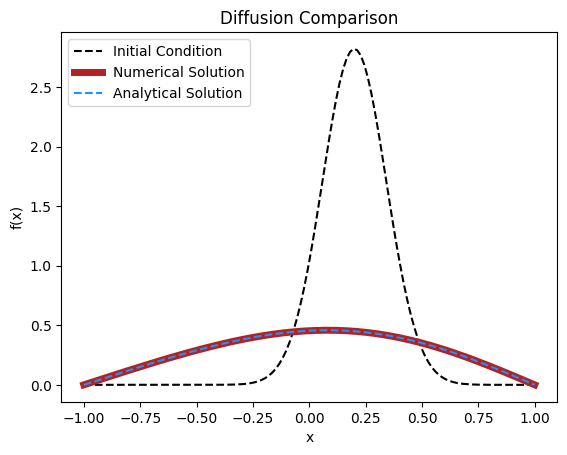

In [15]:
plt.figure(2)
plt.plot(x, T_init, color='black', linestyle = "dashed", label='Initial Condition') # Plot initial function in dashed black
plt.plot(x, f_values[-1], color='firebrick', lw = 5, label='Numerical Solution')
plt.plot(x, analytic_values[-1], color='dodgerblue', ls = "--", label='Analytical Solution')
plt.legend()
plt.title('Comparing the Final States')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

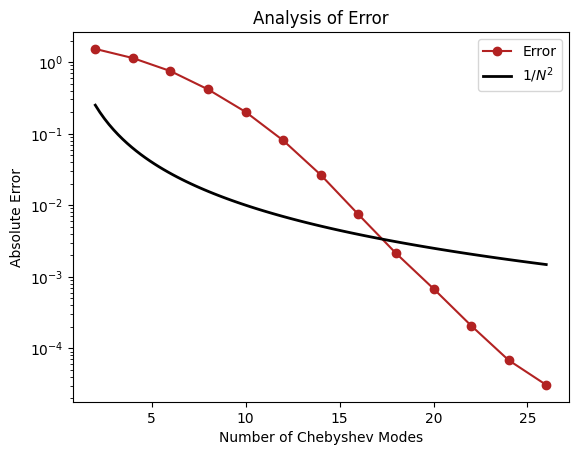

In [30]:
# Set parameters
n = 128 # Number of grid points
x = np.linspace(-1, 1, n, endpoint = True)
dx = x[1] - x[0]
t0 = 0.01
x0 = 0.2
T_init = greens_bounded(x, x0, t0, 1)
t_end = 2*t0
dt = 1e-6

num_chebyshev_array = np.arange(2, 28, 2) # Number of Chebyshev modes
error_vals = np.zeros(len(num_chebyshev_array))
an_soln = greens_bounded(x, x0, t_end, 1)

for i in range(len(num_chebyshev_array)):
    num_chebyshev = num_chebyshev_array[i]
    #print(num_chebyshev)
    # Solve the diffusion equation
    f_values = solve_diffusion_equation(x, T_init, num_chebyshev, t0, t_end, dt)

    # Calculate the error at the final timestep
    error_vals[i] = np.max(np.abs(f_values[-1] - an_soln))

# Plot the results
plot_x = np.linspace(min(num_chebyshev_array), max(num_chebyshev_array), 100)

plt.figure(1)
plt.plot(num_chebyshev_array, error_vals, color='firebrick', marker = "o", label='Error')
plt.plot(plot_x, 1/(plot_x**2), color='black', lw = 2, label='$1/N^2$')
plt.yscale('log')
plt.title('Analysis of Error')
plt.xlabel('Number of Chebyshev Modes')
plt.ylabel('Absolute Error')
plt.legend()
plt.show()

Since this is a spetral method, we wouould normally expect an exponential convergence with the number of modes. The convergence we see here appears to be faster than the $1/N^2$ we might expect for a second-order difference.